In [5]:
import pandas as pd
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.common.keys import Keys
import time

In [112]:
driver = webdriver.Chrome()

driver.get("https://www.movoto.com/new-york-ny/")

In [113]:
rows = driver.find_elements(By.CLASS_NAME,"style1")
print(len(rows))

50


In [114]:
ele1=[]
for row in rows:
    print(row.text)
    ele1.append(row.text)

Listed by Douglas Elliman Real Estate
$185,000
— Bd
1 Ba
500 Sqft
$370/Sqft
1250 Ocean Pkwy #1N, Brooklyn, NY 11230  -  For Sale
NEW 3 HOURS
Listed by Douglas Elliman Real Estate
$599,000
1 Bd
1 Ba
745 Sqft
$804/Sqft
960 Sterling Pl #3B, Brooklyn, NY 11213  -  For Sale
NEW 6 HOURS
Listed by Compass
$1,100,000
4 Bd
1 Ba
1,219 Sqft
46-36 206th St, New York City, NY 11361  -  For Sale
NEW 7 HOURS
Listed by Douglas Elliman Real Estate
$850,000
1 Bd
1 Ba
715 Sqft
$1,189/Sqft
333 Pearl St #8M, New York, NY 10038  -  For Sale
NEW 8 HOURS
$1,700,000
5 Bd
3 Ba
1,720 Sqft
3,049 Sqft
Undisclosed, Brooklyn, NY 11230  -  For Sale
NEW 9 HOURS
$624,999
1 Bd
1 Ba
310 W 99th St #204, New York, NY 10025  -  For Sale
NEW 9 HOURS
OPEN 4/28
$175,000
1 Bd
1 Ba
795 Sqft
$220/Sqft
7 Fordham Hill Oval #4A, Bronx, NY 10468  -  For Sale
NEW 12 HOURS
Photos coming soon
Listed by EXP Realty NYC
$4,995,000
4 Bd
2 Ba
1,886 Sqft
$2,648/Sqft
205 E 22nd St #2-L, New York, NY 10010  -  For Sale
NEW 15 HOURS
Listed by Ak

In [115]:
ele1

['Listed by Douglas Elliman Real Estate\n$185,000\n— Bd\n1 Ba\n500 Sqft\n$370/Sqft\n1250 Ocean Pkwy #1N, Brooklyn, NY 11230  -  For Sale\nNEW 3 HOURS',
 'Listed by Douglas Elliman Real Estate\n$599,000\n1 Bd\n1 Ba\n745 Sqft\n$804/Sqft\n960 Sterling Pl #3B, Brooklyn, NY 11213  -  For Sale\nNEW 6 HOURS',
 'Listed by Compass\n$1,100,000\n4 Bd\n1 Ba\n1,219 Sqft\n46-36 206th St, New York City, NY 11361  -  For Sale\nNEW 7 HOURS',
 'Listed by Douglas Elliman Real Estate\n$850,000\n1 Bd\n1 Ba\n715 Sqft\n$1,189/Sqft\n333 Pearl St #8M, New York, NY 10038  -  For Sale\nNEW 8 HOURS',
 '$1,700,000\n5 Bd\n3 Ba\n1,720 Sqft\n3,049 Sqft\nUndisclosed, Brooklyn, NY 11230  -  For Sale\nNEW 9 HOURS',
 '$624,999\n1 Bd\n1 Ba\n310 W 99th St #204, New York, NY 10025  -  For Sale\nNEW 9 HOURS\nOPEN 4/28',
 '$175,000\n1 Bd\n1 Ba\n795 Sqft\n$220/Sqft\n7 Fordham Hill Oval #4A, Bronx, NY 10468  -  For Sale\nNEW 12 HOURS',
 'Photos coming soon\nListed by EXP Realty NYC\n$4,995,000\n4 Bd\n2 Ba\n1,886 Sqft\n$2,648/Sq

In [116]:
rows = []
for item in ele1:
    details = item.split("\n")
    if len(details) >= 8:  # Check if details list has at least 8 elements
        agency_info = details[0].split("Listed by ")
        if len(agency_info) > 1:  # Check if "Listed by" is present in the string
            agency = agency_info[1]  # Extract agency name
            price = details[1]
            bedrooms = details[2]
            bathrooms = details[3]
            sqft = details[4]
            price_per_sqft = details[5]
            address = details[6]
            status = details[7]
            rows.append([agency, price, bedrooms, bathrooms, sqft, price_per_sqft, address, status])
        else:
            print("Skipping row with missing agency info:", item)
    else:
        print("Skipping row with insufficient data:", item)

# Creating DataFrame
df = pd.DataFrame(rows, columns=['Agency', 'Price', 'Bedrooms', 'Bathrooms', 'Sqft', 'Price_Per_Sqft', 'Address', 'Status'])

# Displaying DataFrame
print(df)

Skipping row with insufficient data: Listed by Compass
$1,100,000
4 Bd
1 Ba
1,219 Sqft
46-36 206th St, New York City, NY 11361  -  For Sale
NEW 7 HOURS
Skipping row with insufficient data: $1,700,000
5 Bd
3 Ba
1,720 Sqft
3,049 Sqft
Undisclosed, Brooklyn, NY 11230  -  For Sale
NEW 9 HOURS
Skipping row with insufficient data: $624,999
1 Bd
1 Ba
310 W 99th St #204, New York, NY 10025  -  For Sale
NEW 9 HOURS
OPEN 4/28
Skipping row with insufficient data: $175,000
1 Bd
1 Ba
795 Sqft
$220/Sqft
7 Fordham Hill Oval #4A, Bronx, NY 10468  -  For Sale
NEW 12 HOURS
Skipping row with missing agency info: Photos coming soon
Listed by EXP Realty NYC
$4,995,000
4 Bd
2 Ba
1,886 Sqft
$2,648/Sqft
205 E 22nd St #2-L, New York, NY 10010  -  For Sale
NEW 15 HOURS
Skipping row with insufficient data: Listed by Nest Seekers LLC
$375,000
1 Bd
1 Ba
154 E 97th St #7, New York, NY 10029  -  For Sale
NEW 16 HOURS
Skipping row with insufficient data: Listed by Douglas Elliman Real Estate
$1,695,000
2 Bd
2 Ba
200 E

In [117]:
df

,Agency,Price,Bedrooms,Bathrooms,Sqft,Price_Per_Sqft,Address,Status
0,Douglas Elliman Real Estate,"$185,000",— Bd,1 Ba,500 Sqft,$370/Sqft,"1250 Ocean Pkwy #1N, Brooklyn, NY 11230 - Fo...",NEW 3 HOURS
1,Douglas Elliman Real Estate,"$599,000",1 Bd,1 Ba,745 Sqft,$804/Sqft,"960 Sterling Pl #3B, Brooklyn, NY 11213 - Fo...",NEW 6 HOURS
2,Douglas Elliman Real Estate,"$850,000",1 Bd,1 Ba,715 Sqft,"$1,189/Sqft","333 Pearl St #8M, New York, NY 10038 - For Sale",NEW 8 HOURS
3,Akam Sales & Brokerage Inc,"$925,000",1 Bd,2 Ba,718 Sqft,"$1,288/Sqft","124 E 79th St #7-A, New York, NY 10075 - For...",NEW 16 HOURS
4,Nest Seekers LLC,"$6,495,000",6 Bd,5 Ba,"3,655 Sqft","$1,777/Sqft","70 Little West St #32-AB, New York, NY 10004 ...",NEW 16 HOURS
5,Compass,"$2,995,000",4 Bd,2 Ba,"2,379 Sqft","$1,259/Sqft","25 E 86th St #1D, New York, NY 10028 - For Sale",NEW 16 HOURS
6,MANTUS REAL ESTATE,"$1,250,000",1 Bd,1 Ba,791 Sqft,"$1,580/Sqft","15 William St #46B, New York, NY 10005 - For...",NEW 18 HOURS
7,Compass,"$649,000",1 Bd,1 Ba,801 Sqft,$810/Sqft,"779 Riverside Dr #B64, New York, NY 10032 - ...",NEW 19 HOURS
8,Simple Real Estate,"$4,200,000",3 Bd,3 Ba,"1,734 Sqft","$2,422/Sqft","50 West St #43A, New York, NY 10006 - For Sale",NEW 21 HOURS
9,City Connections Realty Inc,"$410,000",1 Bd,1 Ba,425 Sqft,$965/Sqft,"48 E 132nd St #4-D, New York, NY 10037 - For...",NEW 22 HOURS


In [118]:
driver = webdriver.Chrome()

driver.get("https://www.movoto.com/new-york-ny/p-2/")

In [119]:
rows = driver.find_elements(By.CLASS_NAME,"style1")
print(len(rows))

50


In [120]:
ele1=[]
for row in rows:
    print(row.text)
    ele1.append(row.text)

Listed by Corcoran Sunshine Marketing Group
$4,825,000
2 Bd
3 Ba
1,727 Sqft
$2,794/Sqft
520 5th Ave #71B, New York, NY 10036  -  For Sale
NEW 38 HOURS
Listed by Corcoran Sunshine Marketing Group
$4,400,000
2 Bd
3 Ba
1,491 Sqft
$2,951/Sqft
520 5th Ave #71A, New York, NY 10036  -  For Sale
NEW 38 HOURS
Listed by Sothebys International Realty
$5,900,000
3 Bd
4 Ba
2,300 Sqft
$2,565/Sqft
715 Park Ave #15DE, New York, NY 10021  -  For Sale
NEW 40 HOURS
Listed by Corcoran Sunshine Marketing Group
$5,950,000
3 Bd
4 Ba
1,957 Sqft
$3,040/Sqft
520 5th Ave #67A, New York, NY 10036  -  For Sale
NEW 38 HOURS
Listed by The Agency Brokerage
$5,950,000
3 Bd
3 Ba
2,910 Sqft
$2,045/Sqft
545 W 20th St #PH6/7B, New York, NY 10011  -  For Sale
NEW 38 HOURS
Listed by Corcoran Group
$3,850,000
5 Bd
4 Ba
3,740 Sqft
$1,029/Sqft
425 Convent Ave, New York, NY 10031  -  For Sale
NEW 39 HOURS
Listed by Douglas Elliman Real Estate
$3,395,000
4 Bd
4 Ba
3,115 Sqft
$1,090/Sqft
429 Kent Ave #TH17, Brooklyn, NY 11249  - 

In [121]:
for item in ele1:
    details = item.split("\n")
    if len(details) >= 8:  # Check if details list has at least 8 elements
        agency_info = details[0].split("Listed by ")
        if len(agency_info) > 1:  # Check if "Listed by" is present in the string
            agency = agency_info[1]  # Extract agency name
            price = details[1]
            bedrooms = details[2]
            bathrooms = details[3]
            sqft = details[4]
            price_per_sqft = details[5]
            address = details[6]
            status = details[7]
            # Append row to existing DataFrame
            df = df.append({'Agency': agency, 'Price': price, 'Bedrooms': bedrooms, 'Bathrooms': bathrooms,
                            'Sqft': sqft, 'Price_Per_Sqft': price_per_sqft, 'Address': address, 'Status': status},
                           ignore_index=True)
        else:
            print("Skipping row with missing agency info:", item)
    else:
        print("Skipping row with insufficient data:", item)

# Displaying DataFrame
print(df)

Skipping row with insufficient data: Listed by Compass
$3,350,000
6 Bd
6 Ba
3,580 Sqft
172 Huntington St #TNHS, Brooklyn, NY 11231  -  For Sale
NEW 40 HOURS
Skipping row with insufficient data: $3,174,700
3 Bd
3 Ba
3,008 Sqft
$1,055/Sqft
52 End Ave #PH2, New York, NY 10028  -  For Sale
NEW 38 HOURS
Skipping row with insufficient data: Listed by Compass
$2,350,000
2 Bd
2 Ba
8 E 83rd St #3G, New York, NY 10028  -  For Sale
NEW 40 HOURS
Skipping row with insufficient data: Listed by Coldwell Banker Warburg
$1,999,999
3 Bd
2 Ba
108 E 82nd St #8A, New York, NY 10028  -  For Sale
NEW 39 HOURS
OPEN 4/28
Skipping row with insufficient data: Listed by Brown Harris Stevens Residential Sales LLC
$1,850,000
4 Bd
4 Ba
362 Hawthorne St, Brooklyn, NY 11225  -  For Sale
NEW 38 HOURS
Skipping row with insufficient data: Listed by Compass
$1,550,000
1 Bd
1 Ba
61 W 9th St #10D, New York, NY 10011  -  For Sale
NEW 40 HOURS
OPEN 4/28
Skipping row with insufficient data: Listed by Douglas Elliman Real Estat

C:\Users\Ria Ann Bijo\AppData\Local\Temp\ipykernel_15096\3986668701.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'Agency': agency, 'Price': price, 'Bedrooms': bedrooms, 'Bathrooms': bathrooms,
C:\Users\Ria Ann Bijo\AppData\Local\Temp\ipykernel_15096\3986668701.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'Agency': agency, 'Price': price, 'Bedrooms': bedrooms, 'Bathrooms': bathrooms,
C:\Users\Ria Ann Bijo\AppData\Local\Temp\ipykernel_15096\3986668701.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'Agency': agency, 'Price': price, 'Bedrooms': bedrooms, 'Bathrooms': bathrooms,
C:\Users\Ria Ann Bijo\AppData\Local\Temp\ipykernel_15096\3986668701.py:15: FutureW

In [122]:
df

,Agency,Price,Bedrooms,Bathrooms,Sqft,Price_Per_Sqft,Address,Status
0,Douglas Elliman Real Estate,"$185,000",— Bd,1 Ba,500 Sqft,$370/Sqft,"1250 Ocean Pkwy #1N, Brooklyn, NY 11230 - Fo...",NEW 3 HOURS
1,Douglas Elliman Real Estate,"$599,000",1 Bd,1 Ba,745 Sqft,$804/Sqft,"960 Sterling Pl #3B, Brooklyn, NY 11213 - Fo...",NEW 6 HOURS
2,Douglas Elliman Real Estate,"$850,000",1 Bd,1 Ba,715 Sqft,"$1,189/Sqft","333 Pearl St #8M, New York, NY 10038 - For Sale",NEW 8 HOURS
3,Akam Sales & Brokerage Inc,"$925,000",1 Bd,2 Ba,718 Sqft,"$1,288/Sqft","124 E 79th St #7-A, New York, NY 10075 - For...",NEW 16 HOURS
4,Nest Seekers LLC,"$6,495,000",6 Bd,5 Ba,"3,655 Sqft","$1,777/Sqft","70 Little West St #32-AB, New York, NY 10004 ...",NEW 16 HOURS
5,Compass,"$2,995,000",4 Bd,2 Ba,"2,379 Sqft","$1,259/Sqft","25 E 86th St #1D, New York, NY 10028 - For Sale",NEW 16 HOURS
6,MANTUS REAL ESTATE,"$1,250,000",1 Bd,1 Ba,791 Sqft,"$1,580/Sqft","15 William St #46B, New York, NY 10005 - For...",NEW 18 HOURS
7,Compass,"$649,000",1 Bd,1 Ba,801 Sqft,$810/Sqft,"779 Riverside Dr #B64, New York, NY 10032 - ...",NEW 19 HOURS
8,Simple Real Estate,"$4,200,000",3 Bd,3 Ba,"1,734 Sqft","$2,422/Sqft","50 West St #43A, New York, NY 10006 - For Sale",NEW 21 HOURS
9,City Connections Realty Inc,"$410,000",1 Bd,1 Ba,425 Sqft,$965/Sqft,"48 E 132nd St #4-D, New York, NY 10037 - For...",NEW 22 HOURS


In [141]:
driver = webdriver.Chrome()

driver.get("https://www.movoto.com/new-york-ny/p-3/")

In [142]:
rows = driver.find_elements(By.CLASS_NAME,"style1")
print(len(rows))

50


In [143]:
ele1=[]
for row in rows:
    #print(row.text)
    ele1.append(row.text)

In [144]:
for item in ele1:
    details = item.split("\n")
    if len(details) >= 8:  # Check if details list has at least 8 elements
        agency_info = details[0].split("Listed by ")
        if len(agency_info) > 1:  # Check if "Listed by" is present in the string
            agency = agency_info[1]  # Extract agency name
            price = details[1]
            bedrooms = details[2]
            bathrooms = details[3]
            sqft = details[4]
            price_per_sqft = details[5]
            address = details[6]
            status = details[7]
            # Append row to existing DataFrame
            df = df.append({'Agency': agency, 'Price': price, 'Bedrooms': bedrooms, 'Bathrooms': bathrooms,
                            'Sqft': sqft, 'Price_Per_Sqft': price_per_sqft, 'Address': address, 'Status': status},
                           ignore_index=True)
        else:
            print("Skipping row with missing agency info:", item)
    else:
        print("Skipping row with insufficient data:", item)


Skipping row with insufficient data: $424,900
4 Bd
4 Ba
2,280 Sqft
1,307 Sqft
27 Tessa Ct, Staten Island, NY 10304  -  For Sale
NEW 41 HOURS
Skipping row with insufficient data: $1,050,000
7 Bd
2 Ba
3,600 Sqft
2,614 Sqft
1354 Morrison Ave, Bronx, NY 10472  -  For Sale
NEW 41 HOURS
Skipping row with insufficient data: $245,000
2 Bd
1 Ba
900 Sqft
$272/Sqft
1480 Thieriot Ave #5K, Bronx, NY 10460  -  For Sale
NEW 41 HOURS
Skipping row with insufficient data: $784,900
4 Bd
3 Ba
1,827 Sqft
$430/Sqft
2573 Pearsall Ave, Bronx, NY 10469  -  For Sale
NEW 41 HOURS
Skipping row with insufficient data: $649,900
— Bd
— Ba
14,900 Sqft
4,356 Sqft
2352 University Ave, Bronx, NY 10468  -  For Sale
NEW 41 HOURS
Skipping row with insufficient data: Listed by Sothebys International Realty
$1,150,000
2 Bd
2 Ba
50 W 96th St #11D, New York, NY 10025  -  For Sale
NEW 41 HOURS
OPEN 4/28
Skipping row with missing agency info: Photos coming soon
Listed by Douglas Elliman Real Estate
$1,788,000
2 Bd
2 Ba
1,200 Sqf

C:\Users\Ria Ann Bijo\AppData\Local\Temp\ipykernel_15096\1274826971.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'Agency': agency, 'Price': price, 'Bedrooms': bedrooms, 'Bathrooms': bathrooms,
C:\Users\Ria Ann Bijo\AppData\Local\Temp\ipykernel_15096\1274826971.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'Agency': agency, 'Price': price, 'Bedrooms': bedrooms, 'Bathrooms': bathrooms,
C:\Users\Ria Ann Bijo\AppData\Local\Temp\ipykernel_15096\1274826971.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'Agency': agency, 'Price': price, 'Bedrooms': bedrooms, 'Bathrooms': bathrooms,
C:\Users\Ria Ann Bijo\AppData\Local\Temp\ipykernel_15096\1274826971.py:15: FutureW

In [145]:
driver = webdriver.Chrome()

driver.get("https://www.movoto.com/new-york-ny/p-4/")

In [146]:
rows = driver.find_elements(By.CLASS_NAME,"style1")
print(len(rows))

50


In [147]:
ele1=[]
for row in rows:
    #print(row.text)
    ele1.append(row.text)

In [148]:
for item in ele1:
    details = item.split("\n")
    if len(details) >= 8:  # Check if details list has at least 8 elements
        agency_info = details[0].split("Listed by ")
        if len(agency_info) > 1:  # Check if "Listed by" is present in the string
            agency = agency_info[1]  # Extract agency name
            price = details[1]
            bedrooms = details[2]
            bathrooms = details[3]
            sqft = details[4]
            price_per_sqft = details[5]
            address = details[6]
            status = details[7]
            # Append row to existing DataFrame
            df = df.append({'Agency': agency, 'Price': price, 'Bedrooms': bedrooms, 'Bathrooms': bathrooms,
                            'Sqft': sqft, 'Price_Per_Sqft': price_per_sqft, 'Address': address, 'Status': status},
                           ignore_index=True)
        else:
            print("Skipping row with missing agency info:", item)
    else:
        print("Skipping row with insufficient data:", item)


Skipping row with insufficient data: Listed by Fox Residential Group Inc
$4,195,000
4 Bd
4 Ba
170 E 79th St #9B, New York, NY 10075  -  For Sale
NEW 45 HOURS
Skipping row with insufficient data: Listed by Compass
$3,595,000
3 Bd
3 Ba
326 W 22nd St #GARDEN, New York, NY 10011  -  For Sale
NEW 2 DAYS
Skipping row with insufficient data: Listed by Douglas Elliman Real Estate
$3,250,000
2 Bd
2 Ba
2 Horatio St #17NP, New York, NY 10014  -  For Sale
NEW 2 DAYS
Skipping row with insufficient data: $2,890,000
7 Bd
8 Ba
2,178 Sqft
399 Madison St, Brooklyn, NY 11221  -  For Sale
NEW 2 DAYS
Skipping row with insufficient data: $1,500,000
8 Bd
4 Ba
3,320 Sqft
2,614 Sqft
1041 Lowell St, Bronx, NY 10459  -  For Sale
NEW 2 DAYS
Skipping row with insufficient data: Listed by Corcoran Group
$1,450,000
3 Bd
2 Ba
116 Pinehurst Ave #B63/64, New York, NY 10033  -  For Sale
NEW 2 DAYS
Skipping row with insufficient data: Listed by Elegran LLC
$1,195,000
1 Bd
1 Ba
348 W 36th St #8-N, New York, NY 10018  -  F

C:\Users\Ria Ann Bijo\AppData\Local\Temp\ipykernel_15096\1274826971.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'Agency': agency, 'Price': price, 'Bedrooms': bedrooms, 'Bathrooms': bathrooms,
C:\Users\Ria Ann Bijo\AppData\Local\Temp\ipykernel_15096\1274826971.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'Agency': agency, 'Price': price, 'Bedrooms': bedrooms, 'Bathrooms': bathrooms,
C:\Users\Ria Ann Bijo\AppData\Local\Temp\ipykernel_15096\1274826971.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'Agency': agency, 'Price': price, 'Bedrooms': bedrooms, 'Bathrooms': bathrooms,
C:\Users\Ria Ann Bijo\AppData\Local\Temp\ipykernel_15096\1274826971.py:15: FutureW

In [132]:
driver = webdriver.Chrome()

driver.get("https://www.movoto.com/new-york-ny/p-5/")

In [133]:
rows = driver.find_elements(By.CLASS_NAME,"style1")
print(len(rows))

50


In [134]:
ele1=[]
for row in rows:
    #print(row.text)
    ele1.append(row.text)

In [135]:
for item in ele1:
    details = item.split("\n")
    if len(details) >= 8:  # Check if details list has at least 8 elements
        agency_info = details[0].split("Listed by ")
        if len(agency_info) > 1:  # Check if "Listed by" is present in the string
            agency = agency_info[1]  # Extract agency name
            price = details[1]
            bedrooms = details[2]
            bathrooms = details[3]
            sqft = details[4]
            price_per_sqft = details[5]
            address = details[6]
            status = details[7]
            # Append row to existing DataFrame
            df = df.append({'Agency': agency, 'Price': price, 'Bedrooms': bedrooms, 'Bathrooms': bathrooms,
                            'Sqft': sqft, 'Price_Per_Sqft': price_per_sqft, 'Address': address, 'Status': status},
                           ignore_index=True)
        else:
            print("Skipping row with missing agency info:", item)
    else:
        print("Skipping row with insufficient data:", item)

# Displaying DataFrame
print(df)

Skipping row with insufficient data: Listed by Douglas Elliman Real Estate
$2,599,000
2 Bd
2 Ba
130 E 75th St #5C, New York, NY 10021  -  For Sale
NEW 2 DAYS
Skipping row with insufficient data: Listed by Compass
$2,495,000
2 Bd
3 Ba
1160 Park Ave #8C, New York, NY 10128  -  For Sale
NEW 2 DAYS
Skipping row with insufficient data: Listed by Brown Harris Stevens Residential Sales LLC
$2,195,000
4 Bd
3 Ba
255 W End Ave #12/13A, New York, NY 10023  -  For Sale
NEW 2 DAYS
Skipping row with insufficient data: Listed by Brick Real Estate LLC
$2,100,000
7 Bd
4 Ba
3,200 Sqft
18-60 Flushing Ave, New York City, NY 11385  -  For Sale
NEW 2 DAYS
Skipping row with insufficient data: Listed by Brown Harris Stevens Residential Sales LLC
$1,895,000
2 Bd
1 Ba
126 W 11th St #74, New York, NY 10011  -  For Sale
NEW 2 DAYS
Skipping row with insufficient data: Listed by Douglas Elliman Real Estate
$1,895,000
2 Bd
2 Ba
407 Central Park W #PHB, New York, NY 10025  -  For Sale
NEW 2 DAYS
Skipping row with ins

C:\Users\Ria Ann Bijo\AppData\Local\Temp\ipykernel_15096\3986668701.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'Agency': agency, 'Price': price, 'Bedrooms': bedrooms, 'Bathrooms': bathrooms,
C:\Users\Ria Ann Bijo\AppData\Local\Temp\ipykernel_15096\3986668701.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'Agency': agency, 'Price': price, 'Bedrooms': bedrooms, 'Bathrooms': bathrooms,
C:\Users\Ria Ann Bijo\AppData\Local\Temp\ipykernel_15096\3986668701.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'Agency': agency, 'Price': price, 'Bedrooms': bedrooms, 'Bathrooms': bathrooms,
C:\Users\Ria Ann Bijo\AppData\Local\Temp\ipykernel_15096\3986668701.py:15: FutureW

In [149]:
df

,Agency,Price,Bedrooms,Bathrooms,Sqft,Price_Per_Sqft,Address,Status
0,Douglas Elliman Real Estate,"$185,000",— Bd,1 Ba,500 Sqft,$370/Sqft,"1250 Ocean Pkwy #1N, Brooklyn, NY 11230 - Fo...",NEW 3 HOURS
1,Douglas Elliman Real Estate,"$599,000",1 Bd,1 Ba,745 Sqft,$804/Sqft,"960 Sterling Pl #3B, Brooklyn, NY 11213 - Fo...",NEW 6 HOURS
2,Douglas Elliman Real Estate,"$850,000",1 Bd,1 Ba,715 Sqft,"$1,189/Sqft","333 Pearl St #8M, New York, NY 10038 - For Sale",NEW 8 HOURS
3,Akam Sales & Brokerage Inc,"$925,000",1 Bd,2 Ba,718 Sqft,"$1,288/Sqft","124 E 79th St #7-A, New York, NY 10075 - For...",NEW 16 HOURS
4,Nest Seekers LLC,"$6,495,000",6 Bd,5 Ba,"3,655 Sqft","$1,777/Sqft","70 Little West St #32-AB, New York, NY 10004 ...",NEW 16 HOURS
...,...,...,...,...,...,...,...,...
120,Trump International Realty New York,"$675,000",— Bd,1 Ba,490 Sqft,"$1,378/Sqft","1 Central Park W #412, New York, NY 10023 - ...",NEW 2 DAYS
121,Compass,"$599,000",1 Bd,2 Ba,"1,099 Sqft",$545/Sqft,"555 Lenox Ave #1C, New York, NY 10037 - For ...",NEW 47 HOURS
122,Douglas Elliman Real Estate,"$565,000",2 Bd,2 Ba,"1,200 Sqft",$471/Sqft,"3515 Henry Hudson Pkwy #7D, New York City, NY ...",NEW 2 DAYS
123,Douglas Elliman Real Estate,"$255,000",2 Bd,1 Ba,880 Sqft,$290/Sqft,"5610 Netherland Ave #1A, New York City, NY 104...",NEW 2 DAYS


In [150]:
df.to_csv('HouseList.csv', index=False)

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("HouseList.csv")
df

,Agency,Price,Bedrooms,Bathrooms,Sqft,Price_Per_Sqft,Address,Status
0,Douglas Elliman Real Estate,"$185,000",— Bd,1 Ba,500 Sqft,$370/Sqft,"1250 Ocean Pkwy #1N, Brooklyn, NY 11230 - Fo...",NEW 3 HOURS
1,Douglas Elliman Real Estate,"$599,000",1 Bd,1 Ba,745 Sqft,$804/Sqft,"960 Sterling Pl #3B, Brooklyn, NY 11213 - Fo...",NEW 6 HOURS
2,Douglas Elliman Real Estate,"$850,000",1 Bd,1 Ba,715 Sqft,"$1,189/Sqft","333 Pearl St #8M, New York, NY 10038 - For Sale",NEW 8 HOURS
3,Akam Sales & Brokerage Inc,"$925,000",1 Bd,2 Ba,718 Sqft,"$1,288/Sqft","124 E 79th St #7-A, New York, NY 10075 - For...",NEW 16 HOURS
4,Nest Seekers LLC,"$6,495,000",6 Bd,5 Ba,"3,655 Sqft","$1,777/Sqft","70 Little West St #32-AB, New York, NY 10004 ...",NEW 16 HOURS
...,...,...,...,...,...,...,...,...
120,Trump International Realty New York,"$675,000",— Bd,1 Ba,490 Sqft,"$1,378/Sqft","1 Central Park W #412, New York, NY 10023 - ...",NEW 2 DAYS
121,Compass,"$599,000",1 Bd,2 Ba,"1,099 Sqft",$545/Sqft,"555 Lenox Ave #1C, New York, NY 10037 - For ...",NEW 47 HOURS
122,Douglas Elliman Real Estate,"$565,000",2 Bd,2 Ba,"1,200 Sqft",$471/Sqft,"3515 Henry Hudson Pkwy #7D, New York City, NY ...",NEW 2 DAYS
123,Douglas Elliman Real Estate,"$255,000",2 Bd,1 Ba,880 Sqft,$290/Sqft,"5610 Netherland Ave #1A, New York City, NY 104...",NEW 2 DAYS


In [3]:
df["Bedrooms"].unique()

array(['— Bd', '1 Bd', '6 Bd', '4 Bd', '3 Bd', '2 Bd', '5 Bd', '9 Bd',
       '7 Bd'], dtype=object)

In [4]:
df = df[df['Bedrooms'] != '— Bd']

In [5]:
df["Bathrooms"].unique()

array(['1 Ba', '2 Ba', '5 Ba', '3 Ba', '6 Ba', '4 Ba', '7 Ba'],
      dtype=object)

In [6]:
df

,Agency,Price,Bedrooms,Bathrooms,Sqft,Price_Per_Sqft,Address,Status
1,Douglas Elliman Real Estate,"$599,000",1 Bd,1 Ba,745 Sqft,$804/Sqft,"960 Sterling Pl #3B, Brooklyn, NY 11213 - Fo...",NEW 6 HOURS
2,Douglas Elliman Real Estate,"$850,000",1 Bd,1 Ba,715 Sqft,"$1,189/Sqft","333 Pearl St #8M, New York, NY 10038 - For Sale",NEW 8 HOURS
3,Akam Sales & Brokerage Inc,"$925,000",1 Bd,2 Ba,718 Sqft,"$1,288/Sqft","124 E 79th St #7-A, New York, NY 10075 - For...",NEW 16 HOURS
4,Nest Seekers LLC,"$6,495,000",6 Bd,5 Ba,"3,655 Sqft","$1,777/Sqft","70 Little West St #32-AB, New York, NY 10004 ...",NEW 16 HOURS
5,Compass,"$2,995,000",4 Bd,2 Ba,"2,379 Sqft","$1,259/Sqft","25 E 86th St #1D, New York, NY 10028 - For Sale",NEW 16 HOURS
...,...,...,...,...,...,...,...,...
118,Corcoran Group,"$825,000",1 Bd,1 Ba,548 Sqft,"$1,505/Sqft","27-09 40th Ave #3D, New York City, NY 11101 -...",NEW 45 HOURS
119,SAMUEL REALTY GROUP LLC,"$675,000",1 Bd,1 Ba,750 Sqft,$900/Sqft,"440 E 79th St #14-G, New York, NY 10075 - Fo...",NEW 2 DAYS
121,Compass,"$599,000",1 Bd,2 Ba,"1,099 Sqft",$545/Sqft,"555 Lenox Ave #1C, New York, NY 10037 - For ...",NEW 47 HOURS
122,Douglas Elliman Real Estate,"$565,000",2 Bd,2 Ba,"1,200 Sqft",$471/Sqft,"3515 Henry Hudson Pkwy #7D, New York City, NY ...",NEW 2 DAYS


In [7]:
df['Address'] = df['Address'].str.replace(r'\s+-\s+For Sale', '', regex=True)

C:\Users\Ria Ann Bijo\AppData\Local\Temp\ipykernel_16576\4049793488.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Address'] = df['Address'].str.replace(r'\s+-\s+For Sale', '', regex=True)


In [8]:
df

,Agency,Price,Bedrooms,Bathrooms,Sqft,Price_Per_Sqft,Address,Status
1,Douglas Elliman Real Estate,"$599,000",1 Bd,1 Ba,745 Sqft,$804/Sqft,"960 Sterling Pl #3B, Brooklyn, NY 11213",NEW 6 HOURS
2,Douglas Elliman Real Estate,"$850,000",1 Bd,1 Ba,715 Sqft,"$1,189/Sqft","333 Pearl St #8M, New York, NY 10038",NEW 8 HOURS
3,Akam Sales & Brokerage Inc,"$925,000",1 Bd,2 Ba,718 Sqft,"$1,288/Sqft","124 E 79th St #7-A, New York, NY 10075",NEW 16 HOURS
4,Nest Seekers LLC,"$6,495,000",6 Bd,5 Ba,"3,655 Sqft","$1,777/Sqft","70 Little West St #32-AB, New York, NY 10004",NEW 16 HOURS
5,Compass,"$2,995,000",4 Bd,2 Ba,"2,379 Sqft","$1,259/Sqft","25 E 86th St #1D, New York, NY 10028",NEW 16 HOURS
...,...,...,...,...,...,...,...,...
118,Corcoran Group,"$825,000",1 Bd,1 Ba,548 Sqft,"$1,505/Sqft","27-09 40th Ave #3D, New York City, NY 11101",NEW 45 HOURS
119,SAMUEL REALTY GROUP LLC,"$675,000",1 Bd,1 Ba,750 Sqft,$900/Sqft,"440 E 79th St #14-G, New York, NY 10075",NEW 2 DAYS
121,Compass,"$599,000",1 Bd,2 Ba,"1,099 Sqft",$545/Sqft,"555 Lenox Ave #1C, New York, NY 10037",NEW 47 HOURS
122,Douglas Elliman Real Estate,"$565,000",2 Bd,2 Ba,"1,200 Sqft",$471/Sqft,"3515 Henry Hudson Pkwy #7D, New York City, NY ...",NEW 2 DAYS


In [9]:
dff = df["Address"].str.split(",")

In [10]:
dff

1            [960 Sterling Pl #3B,  Brooklyn,  NY 11213]
2               [333 Pearl St #8M,  New York,  NY 10038]
3             [124 E 79th St #7-A,  New York,  NY 10075]
4       [70 Little West St #32-AB,  New York,  NY 10004]
5               [25 E 86th St #1D,  New York,  NY 10028]
                             ...                        
118      [27-09 40th Ave #3D,  New York City,  NY 11101]
119          [440 E 79th St #14-G,  New York,  NY 10075]
121            [555 Lenox Ave #1C,  New York,  NY 10037]
122    [3515 Henry Hudson Pkwy #7D,  New York City,  ...
123    [5610 Netherland Ave #1A,  New York City,  NY ...
Name: Address, Length: 117, dtype: object

In [11]:
length = dff.apply(len)
print(length)

1      3
2      3
3      3
4      3
5      3
      ..
118    3
119    3
121    3
122    3
123    3
Name: Address, Length: 117, dtype: int64


In [12]:
length.unique()

array([3, 1], dtype=int64)

In [13]:
rows_with_one_item = df[dff.str.len() == 1]

print(rows_with_one_item)

      Agency       Price Bedrooms Bathrooms        Sqft  \
103  Compass  $2,599,000     4 Bd      4 Ba  2,640 Sqft   

                                  Price_Per_Sqft     Address     Status  
103  91 81st St, Brooklyn, NY 11209  -  For Sale  NEW 2 DAYS  OPEN 4/28  


In [14]:
df = df.drop(index=103)
dff = dff.drop(index=103)

print(df)

                          Agency       Price Bedrooms Bathrooms        Sqft  \
1    Douglas Elliman Real Estate    $599,000     1 Bd      1 Ba    745 Sqft   
2    Douglas Elliman Real Estate    $850,000     1 Bd      1 Ba    715 Sqft   
3     Akam Sales & Brokerage Inc    $925,000     1 Bd      2 Ba    718 Sqft   
4               Nest Seekers LLC  $6,495,000     6 Bd      5 Ba  3,655 Sqft   
5                        Compass  $2,995,000     4 Bd      2 Ba  2,379 Sqft   
..                           ...         ...      ...       ...         ...   
118               Corcoran Group    $825,000     1 Bd      1 Ba    548 Sqft   
119      SAMUEL REALTY GROUP LLC    $675,000     1 Bd      1 Ba    750 Sqft   
121                      Compass    $599,000     1 Bd      2 Ba  1,099 Sqft   
122  Douglas Elliman Real Estate    $565,000     2 Bd      2 Ba  1,200 Sqft   
123  Douglas Elliman Real Estate    $255,000     2 Bd      1 Ba    880 Sqft   

    Price_Per_Sqft                                 

In [15]:
dff = dff.apply(lambda x: pd.Series(x))

dff.columns = ["Street", "City", "Zip Code"]

print(dff)

                         Street            City   Zip Code
1           960 Sterling Pl #3B        Brooklyn   NY 11213
2              333 Pearl St #8M        New York   NY 10038
3            124 E 79th St #7-A        New York   NY 10075
4      70 Little West St #32-AB        New York   NY 10004
5              25 E 86th St #1D        New York   NY 10028
..                          ...             ...        ...
118          27-09 40th Ave #3D   New York City   NY 11101
119         440 E 79th St #14-G        New York   NY 10075
121           555 Lenox Ave #1C        New York   NY 10037
122  3515 Henry Hudson Pkwy #7D   New York City   NY 10463
123     5610 Netherland Ave #1A   New York City   NY 10471

[116 rows x 3 columns]


In [16]:
df = pd.concat([df, dff], axis=1)

In [17]:
df

,Agency,Price,Bedrooms,Bathrooms,Sqft,Price_Per_Sqft,Address,Status,Street,City,Zip Code
1,Douglas Elliman Real Estate,"$599,000",1 Bd,1 Ba,745 Sqft,$804/Sqft,"960 Sterling Pl #3B, Brooklyn, NY 11213",NEW 6 HOURS,960 Sterling Pl #3B,Brooklyn,NY 11213
2,Douglas Elliman Real Estate,"$850,000",1 Bd,1 Ba,715 Sqft,"$1,189/Sqft","333 Pearl St #8M, New York, NY 10038",NEW 8 HOURS,333 Pearl St #8M,New York,NY 10038
3,Akam Sales & Brokerage Inc,"$925,000",1 Bd,2 Ba,718 Sqft,"$1,288/Sqft","124 E 79th St #7-A, New York, NY 10075",NEW 16 HOURS,124 E 79th St #7-A,New York,NY 10075
4,Nest Seekers LLC,"$6,495,000",6 Bd,5 Ba,"3,655 Sqft","$1,777/Sqft","70 Little West St #32-AB, New York, NY 10004",NEW 16 HOURS,70 Little West St #32-AB,New York,NY 10004
5,Compass,"$2,995,000",4 Bd,2 Ba,"2,379 Sqft","$1,259/Sqft","25 E 86th St #1D, New York, NY 10028",NEW 16 HOURS,25 E 86th St #1D,New York,NY 10028
...,...,...,...,...,...,...,...,...,...,...,...
118,Corcoran Group,"$825,000",1 Bd,1 Ba,548 Sqft,"$1,505/Sqft","27-09 40th Ave #3D, New York City, NY 11101",NEW 45 HOURS,27-09 40th Ave #3D,New York City,NY 11101
119,SAMUEL REALTY GROUP LLC,"$675,000",1 Bd,1 Ba,750 Sqft,$900/Sqft,"440 E 79th St #14-G, New York, NY 10075",NEW 2 DAYS,440 E 79th St #14-G,New York,NY 10075
121,Compass,"$599,000",1 Bd,2 Ba,"1,099 Sqft",$545/Sqft,"555 Lenox Ave #1C, New York, NY 10037",NEW 47 HOURS,555 Lenox Ave #1C,New York,NY 10037
122,Douglas Elliman Real Estate,"$565,000",2 Bd,2 Ba,"1,200 Sqft",$471/Sqft,"3515 Henry Hudson Pkwy #7D, New York City, NY ...",NEW 2 DAYS,3515 Henry Hudson Pkwy #7D,New York City,NY 10463


In [18]:
df = df.drop(columns="Address")

In [19]:
dff = df["Zip Code"].str.strip().str.split(" ", expand=True)
dff = dff.drop(columns=[0,2,3,4,5,6,7])
dff.columns = ['Zip']

In [20]:
dff

,Zip
1,11213
2,10038
3,10075
4,10004
5,10028
...,...
118,11101
119,10075
121,10037
122,10463


In [21]:
df = pd.concat([df, dff], axis=1)
df = df.drop(columns='Zip Code')

In [22]:
dff = df["Street"].str.strip().str.split("#", expand=True)
dff.columns = ['Street','Hash']
dff

,Street,Hash
1,960 Sterling Pl,3B
2,333 Pearl St,8M
3,124 E 79th St,7-A
4,70 Little West St,32-AB
5,25 E 86th St,1D
...,...,...
118,27-09 40th Ave,3D
119,440 E 79th St,14-G
121,555 Lenox Ave,1C
122,3515 Henry Hudson Pkwy,7D


In [23]:
last_part = dff['Street'].str.split().str[-1]
Street3 = pd.DataFrame(last_part)
Street3.columns = ['Street3']
print(last_part)

1        Pl
2        St
3        St
4        St
5        St
       ... 
118     Ave
119      St
121     Ave
122    Pkwy
123     Ave
Name: Street, Length: 116, dtype: object


In [24]:
first_part = dff['Street'].str.split().str[0]
Street1 = pd.DataFrame(first_part)
Street1.columns = ['Street1']
print(first_part)

1        960
2        333
3        124
4         70
5         25
       ...  
118    27-09
119      440
121      555
122     3515
123     5610
Name: Street, Length: 116, dtype: object


In [25]:
middle_part = dff['Street'].str.split().str[1:-1].str.join(' ')
Street2 = pd.DataFrame(middle_part)
Street2.columns = ['Street2']
print(middle_part)

1          Sterling
2             Pearl
3            E 79th
4       Little West
5            E 86th
           ...     
118            40th
119          E 79th
121           Lenox
122    Henry Hudson
123      Netherland
Name: Street, Length: 116, dtype: object


In [26]:
dff = dff['Hash']
df = pd.concat([df, dff,Street1,Street2,Street3], axis=1)
df

,Agency,Price,Bedrooms,Bathrooms,Sqft,Price_Per_Sqft,Status,Street,City,Zip,Hash,Street1,Street2,Street3
1,Douglas Elliman Real Estate,"$599,000",1 Bd,1 Ba,745 Sqft,$804/Sqft,NEW 6 HOURS,960 Sterling Pl #3B,Brooklyn,11213,3B,960,Sterling,Pl
2,Douglas Elliman Real Estate,"$850,000",1 Bd,1 Ba,715 Sqft,"$1,189/Sqft",NEW 8 HOURS,333 Pearl St #8M,New York,10038,8M,333,Pearl,St
3,Akam Sales & Brokerage Inc,"$925,000",1 Bd,2 Ba,718 Sqft,"$1,288/Sqft",NEW 16 HOURS,124 E 79th St #7-A,New York,10075,7-A,124,E 79th,St
4,Nest Seekers LLC,"$6,495,000",6 Bd,5 Ba,"3,655 Sqft","$1,777/Sqft",NEW 16 HOURS,70 Little West St #32-AB,New York,10004,32-AB,70,Little West,St
5,Compass,"$2,995,000",4 Bd,2 Ba,"2,379 Sqft","$1,259/Sqft",NEW 16 HOURS,25 E 86th St #1D,New York,10028,1D,25,E 86th,St
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
118,Corcoran Group,"$825,000",1 Bd,1 Ba,548 Sqft,"$1,505/Sqft",NEW 45 HOURS,27-09 40th Ave #3D,New York City,11101,3D,27-09,40th,Ave
119,SAMUEL REALTY GROUP LLC,"$675,000",1 Bd,1 Ba,750 Sqft,$900/Sqft,NEW 2 DAYS,440 E 79th St #14-G,New York,10075,14-G,440,E 79th,St
121,Compass,"$599,000",1 Bd,2 Ba,"1,099 Sqft",$545/Sqft,NEW 47 HOURS,555 Lenox Ave #1C,New York,10037,1C,555,Lenox,Ave
122,Douglas Elliman Real Estate,"$565,000",2 Bd,2 Ba,"1,200 Sqft",$471/Sqft,NEW 2 DAYS,3515 Henry Hudson Pkwy #7D,New York City,10463,7D,3515,Henry Hudson,Pkwy


In [27]:
df['Sqft'] = df['Sqft'].str.replace(' Sqft', '')
df['Price_Per_Sqft'] = df['Price_Per_Sqft'].str.replace('/Sqft', '')
df['Bedrooms'] = df['Bedrooms'].str.replace(' Bd', '')
df['Bathrooms'] = df['Bathrooms'].str.replace(' Ba', '')

In [28]:
df

,Agency,Price,Bedrooms,Bathrooms,Sqft,Price_Per_Sqft,Status,Street,City,Zip,Hash,Street1,Street2,Street3
1,Douglas Elliman Real Estate,"$599,000",1,1,745,$804,NEW 6 HOURS,960 Sterling Pl #3B,Brooklyn,11213,3B,960,Sterling,Pl
2,Douglas Elliman Real Estate,"$850,000",1,1,715,"$1,189",NEW 8 HOURS,333 Pearl St #8M,New York,10038,8M,333,Pearl,St
3,Akam Sales & Brokerage Inc,"$925,000",1,2,718,"$1,288",NEW 16 HOURS,124 E 79th St #7-A,New York,10075,7-A,124,E 79th,St
4,Nest Seekers LLC,"$6,495,000",6,5,"3,655","$1,777",NEW 16 HOURS,70 Little West St #32-AB,New York,10004,32-AB,70,Little West,St
5,Compass,"$2,995,000",4,2,"2,379","$1,259",NEW 16 HOURS,25 E 86th St #1D,New York,10028,1D,25,E 86th,St
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
118,Corcoran Group,"$825,000",1,1,548,"$1,505",NEW 45 HOURS,27-09 40th Ave #3D,New York City,11101,3D,27-09,40th,Ave
119,SAMUEL REALTY GROUP LLC,"$675,000",1,1,750,$900,NEW 2 DAYS,440 E 79th St #14-G,New York,10075,14-G,440,E 79th,St
121,Compass,"$599,000",1,2,"1,099",$545,NEW 47 HOURS,555 Lenox Ave #1C,New York,10037,1C,555,Lenox,Ave
122,Douglas Elliman Real Estate,"$565,000",2,2,"1,200",$471,NEW 2 DAYS,3515 Henry Hudson Pkwy #7D,New York City,10463,7D,3515,Henry Hudson,Pkwy


In [29]:
df = df.drop(columns = ['Street','City','Status'])

In [30]:
df['Agency'].unique()

array(['Douglas Elliman Real Estate', 'Akam Sales & Brokerage Inc',
       'Nest Seekers LLC', 'Compass', 'MANTUS REAL ESTATE',
       'Simple Real Estate', 'City Connections Realty Inc', 'Serhant LLC',
       'Corcoran Group', 'Sothebys International Realty',
       'Corcoran Sunshine Marketing Group', 'The Agency Brokerage',
       'Brown Harris Stevens Residential Sales LLC',
       'REAVIS PARTNERS LLC', 'William Raveis New York City LLC',
       'Brick Real Estate LLC', 'Brown Harris Stevens Brooklyn LLC',
       'Revived Residential', 'LoHo Realty Inc',
       'Bond New York Properties LLC', 'R New York', 'Maxwell Jacobs Inc',
       'Coldwell Banker Warburg', 'SAMUEL REALTY GROUP LLC'], dtype=object)

In [31]:
df['Street1'].unique()

array(['960', '333', '124', '70', '25', '15', '779', '50', '48', '914',
       '341', '251', '305', '27', '136', '201', '250', '200', '310',
       '100', '30', '84', '520', '715', '545', '425', '429', '215', '300',
       '75', '229', '107', '2257', '128', '461', '111', '277', '816',
       '140', '62', '400', '10', '695', '176', '252', '476', '450', '406',
       '1600', '234', '637', '210', '491', '336', '577', '171', '151',
       '180', '395', '533', '42', '116', '308', '165', '16', '120', '207',
       '482', '297', '82', '27-09', '404', '1', '139', '440', '570',
       '575', '31', '155', '133', '242', '372', '555', '3515', '5610'],
      dtype=object)

In [32]:
df['Street2'].unique()

array(['Sterling', 'Pearl', 'E 79th', 'Little West', 'E 86th', 'William',
       'Riverside', 'West', 'E 132nd', 'Pine', '13th', 'W 14th', '2nd',
       'W 72nd', 'E 64th', 'W 17th', 'S End', 'E 75th', 'E 46th',
       'Claremont', 'W 61st', 'Leonard', 'Congress', '5th', 'Park',
       'W 20th', 'Convent', 'Kent', 'W 28th', 'E 40th', 'Wall', 'E 20th',
       'Hawthorne', 'Ave', 'Adam Clayton Powell Jr', 'E 28th', 'W 22nd',
       'Murray', 'W End', 'Lafayette', 'E 63rd', 'W 62nd', 'E 77th',
       'Degraw', 'Kingsland', 'E 1st', '7th', 'Union', 'Grand', 'Midwood',
       '', 'Madison', 'Monroe', 'Central Park', 'E 84th', 'Clermont',
       'E 12th', 'Barrow', 'E 67th', 'E 65th', 'E 38th', 'Charles', '8th',
       'Lexington', 'N 8th', 'Greenwich', 'Hicks', 'Suydam', '40th',
       'E 93rd', 'Park Ave', 'E 23rd', 'Broome', 'N Elliott', 'W 68th',
       'Water', 'Jay', 'E 25th', 'Dekalb', 'Lenox', 'Henry Hudson',
       'Netherland'], dtype=object)

In [33]:
df['Street3'].unique()

array(['Pl', 'St', 'Dr', 'Ave', 'A', 'Blvd', 'Broadway', 'W', 'S', 'Pkwy'],
      dtype=object)

In [34]:
df['Zip'].unique()

array(['11213', '10038', '10075', '10004', '10028', '10005', '10032',
       '10006', '10037', '11208', '11215', '10011', '10003', '10023',
       '10065', '10280', '10021', '10017', '10027', '10013', '11201',
       '10036', '10031', '11249', '10001', '10016', '11225', '10009',
       '10007', '11221', '11217', '11222', '11211', '11238', '10019',
       '10002', '10014', '10069', '11101', '10128', '10010', '10024',
       '11210', '11205', '10463', '10471'], dtype=object)

In [35]:
frequency_map = df['Agency'].value_counts(normalize=True)
df['Agency'] = df['Agency'].map(frequency_map)
frequency_map = df['Zip'].value_counts(normalize=True)
df['Zip'] = df['Zip'].map(frequency_map)

In [36]:
df

,Agency,Price,Bedrooms,Bathrooms,Sqft,Price_Per_Sqft,Zip,Hash,Street1,Street2,Street3
1,0.172414,"$599,000",1,1,745,$804,0.008621,3B,960,Sterling,Pl
2,0.172414,"$850,000",1,1,715,"$1,189",0.008621,8M,333,Pearl,St
3,0.008621,"$925,000",1,2,718,"$1,288",0.034483,7-A,124,E 79th,St
4,0.017241,"$6,495,000",6,5,"3,655","$1,777",0.008621,32-AB,70,Little West,St
5,0.215517,"$2,995,000",4,2,"2,379","$1,259",0.017241,1D,25,E 86th,St
...,...,...,...,...,...,...,...,...,...,...,...
118,0.172414,"$825,000",1,1,548,"$1,505",0.034483,3D,27-09,40th,Ave
119,0.008621,"$675,000",1,1,750,$900,0.034483,14-G,440,E 79th,St
121,0.215517,"$599,000",1,2,"1,099",$545,0.017241,1C,555,Lenox,Ave
122,0.172414,"$565,000",2,2,"1,200",$471,0.008621,7D,3515,Henry Hudson,Pkwy


In [37]:
df['Price'] = df['Price'].str.replace('$', '').str.replace(',', '').astype(float)
df['Price_Per_Sqft'] = df['Price_Per_Sqft'].astype(str).str.replace('$', '').str.replace(',', '').astype(float)

C:\Users\Ria Ann Bijo\AppData\Local\Temp\ipykernel_16576\263602026.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['Price'] = df['Price'].str.replace('$', '').str.replace(',', '').astype(float)
C:\Users\Ria Ann Bijo\AppData\Local\Temp\ipykernel_16576\263602026.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['Price_Per_Sqft'] = df['Price_Per_Sqft'].astype(str).str.replace('$', '').str.replace(',', '').astype(float)


In [38]:
df

,Agency,Price,Bedrooms,Bathrooms,Sqft,Price_Per_Sqft,Zip,Hash,Street1,Street2,Street3
1,0.172414,599000.0,1,1,745,804.0,0.008621,3B,960,Sterling,Pl
2,0.172414,850000.0,1,1,715,1189.0,0.008621,8M,333,Pearl,St
3,0.008621,925000.0,1,2,718,1288.0,0.034483,7-A,124,E 79th,St
4,0.017241,6495000.0,6,5,"3,655",1777.0,0.008621,32-AB,70,Little West,St
5,0.215517,2995000.0,4,2,"2,379",1259.0,0.017241,1D,25,E 86th,St
...,...,...,...,...,...,...,...,...,...,...,...
118,0.172414,825000.0,1,1,548,1505.0,0.034483,3D,27-09,40th,Ave
119,0.008621,675000.0,1,1,750,900.0,0.034483,14-G,440,E 79th,St
121,0.215517,599000.0,1,2,"1,099",545.0,0.017241,1C,555,Lenox,Ave
122,0.172414,565000.0,2,2,"1,200",471.0,0.008621,7D,3515,Henry Hudson,Pkwy


In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 116 entries, 1 to 123
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Agency          116 non-null    float64
 1   Price           116 non-null    float64
 2   Bedrooms        116 non-null    object 
 3   Bathrooms       116 non-null    object 
 4   Sqft            116 non-null    object 
 5   Price_Per_Sqft  116 non-null    float64
 6   Zip             116 non-null    float64
 7   Hash            107 non-null    object 
 8   Street1         116 non-null    object 
 9   Street2         116 non-null    object 
 10  Street3         116 non-null    object 
dtypes: float64(4), object(7)
memory usage: 10.9+ KB


In [40]:
df['Bedrooms'] = pd.to_numeric(df['Bedrooms'], errors='coerce')
df['Bathrooms'] = pd.to_numeric(df['Bathrooms'], errors='coerce')
df['Sqft'] = df['Sqft'].str.replace(',', '').astype(float)

In [41]:
df

,Agency,Price,Bedrooms,Bathrooms,Sqft,Price_Per_Sqft,Zip,Hash,Street1,Street2,Street3
1,0.172414,599000.0,1,1,745.0,804.0,0.008621,3B,960,Sterling,Pl
2,0.172414,850000.0,1,1,715.0,1189.0,0.008621,8M,333,Pearl,St
3,0.008621,925000.0,1,2,718.0,1288.0,0.034483,7-A,124,E 79th,St
4,0.017241,6495000.0,6,5,3655.0,1777.0,0.008621,32-AB,70,Little West,St
5,0.215517,2995000.0,4,2,2379.0,1259.0,0.017241,1D,25,E 86th,St
...,...,...,...,...,...,...,...,...,...,...,...
118,0.172414,825000.0,1,1,548.0,1505.0,0.034483,3D,27-09,40th,Ave
119,0.008621,675000.0,1,1,750.0,900.0,0.034483,14-G,440,E 79th,St
121,0.215517,599000.0,1,2,1099.0,545.0,0.017241,1C,555,Lenox,Ave
122,0.172414,565000.0,2,2,1200.0,471.0,0.008621,7D,3515,Henry Hudson,Pkwy


In [42]:
frequency_map = df['Hash'].value_counts(normalize=True)
df['Hash'] = df['Hash'].map(frequency_map)
frequency_map = df['Street1'].value_counts(normalize=True)
df['Street1'] = df['Street1'].map(frequency_map)
frequency_map = df['Street2'].value_counts(normalize=True)
df['Street2'] = df['Street2'].map(frequency_map)

In [43]:
df.isna().sum()

Agency            0
Price             0
Bedrooms          0
Bathrooms         0
Sqft              0
Price_Per_Sqft    0
Zip               0
Hash              9
Street1           0
Street2           0
Street3           0
dtype: int64

In [44]:
df.dropna(subset=['Hash'], inplace=True)
df

,Agency,Price,Bedrooms,Bathrooms,Sqft,Price_Per_Sqft,Zip,Hash,Street1,Street2,Street3
1,0.172414,599000.0,1,1,745.0,804.0,0.008621,0.037383,0.008621,0.008621,Pl
2,0.172414,850000.0,1,1,715.0,1189.0,0.008621,0.009346,0.017241,0.008621,St
3,0.008621,925000.0,1,2,718.0,1288.0,0.034483,0.009346,0.008621,0.025862,St
4,0.017241,6495000.0,6,5,3655.0,1777.0,0.008621,0.009346,0.008621,0.008621,St
5,0.215517,2995000.0,4,2,2379.0,1259.0,0.017241,0.009346,0.017241,0.008621,St
...,...,...,...,...,...,...,...,...,...,...,...
118,0.172414,825000.0,1,1,548.0,1505.0,0.034483,0.009346,0.034483,0.034483,Ave
119,0.008621,675000.0,1,1,750.0,900.0,0.034483,0.009346,0.017241,0.025862,St
121,0.215517,599000.0,1,2,1099.0,545.0,0.017241,0.009346,0.008621,0.008621,Ave
122,0.172414,565000.0,2,2,1200.0,471.0,0.008621,0.009346,0.008621,0.008621,Pkwy


In [45]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

df['Street3'] = label_encoder.fit_transform(df['Street3'])

In [46]:
from sklearn.preprocessing import StandardScaler
numerical_columns = ['Price', 'Bedrooms', 'Bathrooms', 'Sqft', 'Price_Per_Sqft']
scaler = StandardScaler()
df[numerical_columns] = scaler.fit_transform(df[numerical_columns])

## Decision Tree

In [47]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

In [48]:
X = df.drop(columns='Street3')
y = df['Street3']

In [49]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [50]:
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

In [51]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.6363636363636364


## Grid Search

In [52]:
criterion = ["gini", "entropy", "log_loss"]
splitter = ["best", "random"]
max_features = [0.2,0.6,1.0]
max_depth = [2,4,6,8,10]
min_samples_leaf = [0.2,0.5,1]

In [53]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    'criterion' : criterion,
    'splitter' : splitter,
    'max_features' : max_features,
    'max_depth' : max_depth,
    'min_samples_leaf' : min_samples_leaf,
}

In [54]:
from sklearn.model_selection import GridSearchCV

dt_grid = GridSearchCV(estimator = clf, 
                       param_grid = param_grid, 
                       cv = 5, 
                       verbose=2, 
                       n_jobs = -1)
print(dt_grid)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [2, 4, 6, 8, 10],
                         'max_features': [0.2, 0.6, 1.0],
                         'min_samples_leaf': [0.2, 0.5, 1],
                         'splitter': ['best', 'random']},
             verbose=2)


In [55]:
dt_grid.fit(X_train,y_train)

Fitting 5 folds for each of 270 candidates, totalling 1350 fits


C:\Users\Ria Ann Bijo\anaconda3\Lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [2, 4, 6, 8, 10],
                         'max_features': [0.2, 0.6, 1.0],
                         'min_samples_leaf': [0.2, 0.5, 1],
                         'splitter': ['best', 'random']},
             verbose=2)

In [56]:
dt_grid.best_params_

{'criterion': 'gini',
 'max_depth': 4,
 'max_features': 0.6,
 'min_samples_leaf': 1,
 'splitter': 'best'}

In [57]:
dt_grid.best_score_

0.8117647058823529

## Cross Validation

In [60]:
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
dt_classifier = DecisionTreeClassifier()
cv_scores = cross_val_score(dt_classifier, X_train, y_train, cv=5)
print("Cross-validation Scores:", cv_scores)

Cross-validation Scores: [0.76470588 0.88235294 0.70588235 0.70588235 0.70588235]


C:\Users\Ria Ann Bijo\anaconda3\Lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


In [61]:
mean_cv_score = cv_scores.mean()
print(mean_cv_score)

0.7529411764705883


## Random Forest

In [62]:
from sklearn.ensemble import RandomForestClassifier

In [63]:
X = df.drop(columns='Street3')
y = df['Street3']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [64]:
from sklearn.model_selection import cross_val_score

In [65]:
rf = RandomForestClassifier()
rf.fit(X_train,y_train)
cv_scores = cross_val_score(rf, X_train, y_train, cv=5, scoring='accuracy')
mean_cv_score = cv_scores.mean()
print(mean_cv_score)

C:\Users\Ria Ann Bijo\anaconda3\Lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


0.7764705882352941


In [66]:
y_pred = rf.predict(X_test)
accuracy_score(y_test,y_pred)

0.6363636363636364

### Grid Search

In [67]:
n_estimators = [20,60,100,120]
max_features = [0.2,0.6,1.0]
max_depth = [2,8,None]
max_samples = [0.5,0.75,1.0]
criterion = ["gini", "entropy", "log_loss"]

In [68]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    'n_estimators' : n_estimators,
    'max_features' : max_features,
    'max_depth' : max_depth,
    'max_samples' : max_samples,
    'criterion' : criterion
}

In [69]:
from sklearn.model_selection import GridSearchCV

rf_grid = GridSearchCV(estimator = rf, 
                       param_grid = param_grid, 
                       cv = 5, 
                       verbose=2, 
                       n_jobs = -1)
print(rf_grid)

GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [2, 8, None],
                         'max_features': [0.2, 0.6, 1.0],
                         'max_samples': [0.5, 0.75, 1.0],
                         'n_estimators': [20, 60, 100, 120]},
             verbose=2)


In [70]:
rf_grid.fit(X_train,y_train)

Fitting 5 folds for each of 324 candidates, totalling 1620 fits


C:\Users\Ria Ann Bijo\anaconda3\Lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [2, 8, None],
                         'max_features': [0.2, 0.6, 1.0],
                         'max_samples': [0.5, 0.75, 1.0],
                         'n_estimators': [20, 60, 100, 120]},
             verbose=2)

In [71]:
rf_grid.best_params_

{'criterion': 'gini',
 'max_depth': 8,
 'max_features': 1.0,
 'max_samples': 1.0,
 'n_estimators': 120}

In [72]:
rf_grid.best_score_

0.8117647058823529

## Cross Validation

In [73]:
rf_classifier = RandomForestClassifier()
cv_scores = cross_val_score(rf_classifier, X_train, y_train, cv=5)
print("Cross-validation Scores:", cv_scores)

C:\Users\Ria Ann Bijo\anaconda3\Lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


Cross-validation Scores: [0.82352941 1.         0.64705882 0.76470588 0.76470588]


In [74]:
mean_cv_score = cv_scores.mean()
print(mean_cv_score)

0.8


# KNN

In [75]:
X = df.drop(columns='Street3')
y = df['Street3']
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2,random_state = 2)

In [76]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 7)

In [77]:
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=7)

In [78]:
from sklearn.metrics import accuracy_score

y_pred = knn.predict(X_test)
#y_pred is us storing predicted values
accuracy_score(y_test, y_pred)

0.5909090909090909

In [79]:
scores =[]
for i in range(1,16):
    knn = KNeighborsClassifier(n_neighbors = i)
    knn.fit(X_train,y_train)
    
    y_pred = knn.predict(X_test)
    scores.append(accuracy_score(y_test, y_pred))

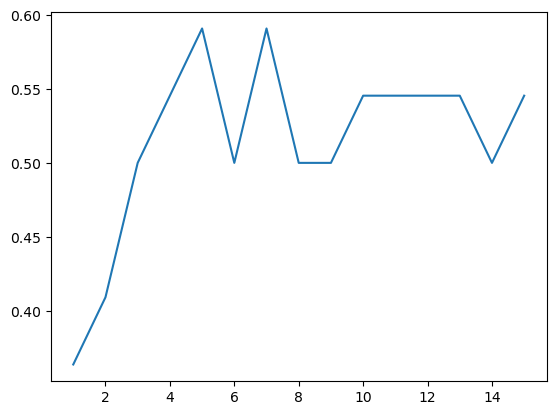

In [80]:
import matplotlib.pyplot as plt

plt.plot(range(1,16),scores)
plt.show()

## Grid Serach

In [81]:
n_neighbors = [3,5,7,9]
weights = ['uniform', 'distance']
algorithm = ['auto', 'ball_tree', 'kd_tree', 'brute']
p = [1,2]

In [82]:
param_grid = {
    'n_neighbors' : n_neighbors,
    'weights' : weights,
    'algorithm' : algorithm,
    'p' : p,
}

In [83]:
knn_grid = GridSearchCV(estimator = knn, 
                       param_grid = param_grid, 
                       cv = 5, 
                       verbose=2, 
                       n_jobs = -1)
print(knn_grid)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(n_neighbors=15), n_jobs=-1,
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'n_neighbors': [3, 5, 7, 9], 'p': [1, 2],
                         'weights': ['uniform', 'distance']},
             verbose=2)


In [84]:
knn_grid.fit(X_train,y_train)

Fitting 5 folds for each of 64 candidates, totalling 320 fits


C:\Users\Ria Ann Bijo\anaconda3\Lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


GridSearchCV(cv=5, estimator=KNeighborsClassifier(n_neighbors=15), n_jobs=-1,
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'n_neighbors': [3, 5, 7, 9], 'p': [1, 2],
                         'weights': ['uniform', 'distance']},
             verbose=2)

In [85]:
knn_grid.best_params_

{'algorithm': 'auto', 'n_neighbors': 7, 'p': 1, 'weights': 'distance'}

In [86]:
knn_grid.best_score_

0.5529411764705883

## Cross Validation

In [87]:
knn_classifier = KNeighborsClassifier(n_neighbors=5)
cv_scores = cross_val_score(knn_classifier, X_train, y_train, cv=5)
print("Cross-validation Scores:", cv_scores)

Cross-validation Scores: [0.47058824 0.41176471 0.58823529 0.47058824 0.35294118]


C:\Users\Ria Ann Bijo\anaconda3\Lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


In [88]:
mean_cv_score = cv_scores.mean()
print(mean_cv_score)

0.45882352941176474


## SVM

In [89]:
from sklearn.svm import SVC

In [90]:
X = df.drop(columns='Street3')
y = df['Street3']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [91]:
svm_classifier = SVC()

svm_classifier.fit(X_train, y_train)

SVC()

In [92]:
y_pred = svm_classifier.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.5454545454545454


In [93]:
from sklearn import svm

In [94]:
clf = svm.SVC(kernel='linear', C=1).fit(X_train, y_train)
clf.score(X_test, y_test)

0.5454545454545454

## Grid Search

In [95]:
C = [0.2,0.4,0.6,1]
kernel = ['linear', 'poly', 'rbf', 'sigmoid']
degree = [1,2,3,4]
gamma = ['scale', 'auto']

In [96]:
param_grid = {
    'C' : C,
    'kernel' : kernel,
    'degree' : degree,
    'gamma' : gamma,
}

In [97]:
svc_grid = GridSearchCV(estimator = clf, 
                       param_grid = param_grid, 
                       cv = 5, 
                       verbose=2, 
                       n_jobs = -1)
print(svc_grid)

GridSearchCV(cv=5, estimator=SVC(C=1, kernel='linear'), n_jobs=-1,
             param_grid={'C': [0.2, 0.4, 0.6, 1], 'degree': [1, 2, 3, 4],
                         'gamma': ['scale', 'auto'],
                         'kernel': ['linear', 'poly', 'rbf', 'sigmoid']},
             verbose=2)


In [98]:
svc_grid.fit(X_train,y_train)

Fitting 5 folds for each of 128 candidates, totalling 640 fits


C:\Users\Ria Ann Bijo\anaconda3\Lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


GridSearchCV(cv=5, estimator=SVC(C=1, kernel='linear'), n_jobs=-1,
             param_grid={'C': [0.2, 0.4, 0.6, 1], 'degree': [1, 2, 3, 4],
                         'gamma': ['scale', 'auto'],
                         'kernel': ['linear', 'poly', 'rbf', 'sigmoid']},
             verbose=2)

In [99]:
svc_grid.best_params_

{'C': 0.2, 'degree': 1, 'gamma': 'scale', 'kernel': 'linear'}

In [100]:
svc_grid.best_score_

0.580952380952381

## Cross Validation

In [101]:
clf = svm.SVC(kernel='linear', C=1, random_state=42)
scores = cross_val_score(clf, X, y, cv=5)
scores

C:\Users\Ria Ann Bijo\anaconda3\Lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


array([0.54545455, 0.54545455, 0.57142857, 0.61904762, 0.52380952])

In [102]:
mean_scores = scores.mean()
print(mean_scores)

0.561038961038961


## Naive Bayes

In [103]:
from sklearn.naive_bayes import GaussianNB
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [104]:
model = GaussianNB()

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

In [105]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.6060606060606061


## Cross Validation

In [106]:
b_classifier = GaussianNB()

# Perform 5-fold cross-validation
cv_scores = cross_val_score(model, X_train, y_train, cv=5)

# Print the cross-validation scores
print("Cross-validation scores:", cv_scores)

Cross-validation scores: [0.86666667 0.46666667 0.6        0.66666667 0.78571429]


C:\Users\Ria Ann Bijo\anaconda3\Lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


In [107]:
print("Mean cross-validation score:", cv_scores.mean())

Mean cross-validation score: 0.6771428571428572


In [112]:
import plotly.graph_objects as go
from sklearn.metrics import roc_curve, roc_auc_score
# Decision Tree Model
dt_model = DecisionTreeClassifier(criterion = 'gini', max_depth = 4, max_features = 0.6, min_samples_leaf = 1, splitter = 'best')
dt_model.fit(X_train, y_train)
dt_scores = dt_model.predict_proba(X_test)[:,1]

# Random Forest Model
rf_model = RandomForestClassifier(criterion = 'gini', max_depth = 8, max_features = 1.0, max_samples = 1.0, n_estimators = 120)
rf_model.fit(X_train, y_train)
rf_scores = rf_model.predict_proba(X_test)[:,1]

#Knn Model
knn_model = KNeighborsClassifier(n_neighbors = 7, algorithm = 'auto', p = 1, weights = 'distance')
knn_model.fit(X_train, y_train)
knn_scores = knn_model.predict_proba(X_test)[:,1]

# SVM Model
svm_model = SVC(C = 0.2, degree = 1, gamma = 'scale', kernel = 'linear', probability=True)
svm_model.fit(X_train, y_train)
svm_scores = svm_model.predict_proba(X_test)[:,1]

#Naive Bayes Model
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)
nb_scores = nb_model.predict_proba(X_test)[:,1]

# Generate ROC curve data for Decision Tree Model
dt_fpr, dt_tpr, dt_thresholds = roc_curve(y_test, dt_scores)
dt_auc = roc_auc_score(y_test, dt_scores)

# Generate ROC curve data for Random Forest Model
rf_fpr, rf_tpr, rf_thresholds = roc_curve(y_test, rf_scores)
rf_auc = roc_auc_score(y_test, rf_scores)

# Generate ROC curve data for KNN Model
knn_fpr, knn_tpr, knn_thresholds = roc_curve(y_test, knn_scores)
knn_auc = roc_auc_score(y_test, knn_scores)

# Generate ROC curve data for SVM Model
svm_fpr, svm_tpr, svm_thresholds = roc_curve(y_test, svm_scores)
svm_auc = roc_auc_score(y_test, svm_scores)

# Generate ROC curve data for Naive Bayes Model
nb_fpr, nb_tpr, nb_thresholds = roc_curve(y_test, nb_scores)
nb_auc = roc_auc_score(y_test, nb_scores)

# Generate a trace for the Decision Tree ROC curve
trace0 = go.Scatter(
    x=dt_fpr,
    y=dt_tpr,
    mode='lines',
    name=f'Decision Tree (Area = {lr_auc:.2f})'
)

# Generate a trace for the SVM ROC curve
trace1 = go.Scatter(
    x=rf_fpr,
    y=rf_tpr,
    mode='lines',
    name=f'Random Forest (Area = {svm_auc:.2f})'
)
# Generate a trace for the KNN ROC curve
trace2 = go.Scatter(
    x=knn_fpr,
    y=knn_tpr,
    mode='lines',
    name=f'KNN (Area = {lr_auc:.2f})'
)

# Generate a trace for the SVM ROC curve
trace3 = go.Scatter(
    x=svm_fpr,
    y=svm_tpr,
    mode='lines',
    name=f'SVM (Area = {svm_auc:.2f})'
)

# Generate a trace for the Naive Bayes ROC curve
trace4 = go.Scatter(
    x=nb_fpr,
    y=nb_tpr,
    mode='lines',
    name=f'SVM (Area = {nb_auc:.2f})'
)

# Diagonal line
trace5 = go.Scatter(
    x=[0, 1], 
    y=[0, 1], 
    mode='lines', 
    name='Random (Area = 0.5)', 
    line=dict(dash='dash')
)

data = [trace0, trace1, trace2, trace3, trace4, trace5]

# Define layout with square aspect ratio
layout = go.Layout(
    title='Receiver Operating Characteristic',
    xaxis=dict(title='False Positive Rate'),
    yaxis=dict(title='True Positive Rate'),
    autosize=False,
    width=800,
    height=800,
    showlegend=True
)

# Define figure and add data
fig = go.Figure(data=data, layout=layout)

# Show figure
fig.show()

ValueError: multiclass format is not supported

In [116]:
## Will not work for multiclass

In [117]:
# Random Forest Model worked the best for this data 

In [ ]:
# KNN Model was the